In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
train_data = pd.read_csv('../input/home-credit-default-risk/application_train.csv')
test_data = pd.read_csv('../input/home-credit-default-risk/application_test.csv')

In [ ]:
print("Train data shape: ", train_data.shape, " rows, cols")
train_data.sample(10)

In [ ]:
print("Test data shape: ", test_data.shape, " rows, cols")
test_data.sample(10)

# Визначаємо типи колонок

In [ ]:
train_data.dtypes

In [ ]:
test_data.dtypes

In [ ]:
categorial = {"NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
                        "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
                        "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",
                        "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
                        "WEEKDAY_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",
                        "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE", 
                        "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", 
                        "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", 
                        "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", 
                        "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", 
                        "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"}
train_data["TARGET"] = train_data["TARGET"].astype("category")
for feature in categorial:
    train_data[feature] = train_data[feature].astype("category")
    test_data[feature] = test_data[feature].astype("category")

In [ ]:
train_data[categorial].sample(10)

In [ ]:
test_data[categorial].sample(10)

# Пропущені значення

In [ ]:
print(train_data.isnull().sum())

In [ ]:
print(test_data.isnull().sum())

# Перевірка даних на дублікати

In [ ]:
train_data[train_data.duplicated()]

In [ ]:
test_data[test_data.duplicated()]

# Розподіл

In [ ]:
numerical = train_data.select_dtypes(include = ['float64', 'int64']).columns
train_data[numerical].hist(figsize=(20, 40), color = 'g', bins=40, xlabelsize=10, ylabelsize=10)

# Outliers

In [ ]:
fig, axes = plt.subplots(nrows=len(numerical), ncols=1)
fig.set_size_inches(20, 120)
for i, col in enumerate(numerical):
    sns.boxplot(data=train_data[col], orient='h', ax=axes[i], color='g')
plt.show()

In [ ]:
train_data.describe()

In [ ]:
train_data[categorial].describe()

In [ ]:
train_data.median()

In [ ]:
train_data.mean()

## Знаходимо матрицю кореляції

In [ ]:
correlation_matrix = train_data.corr()
mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(180,90)
sns.heatmap(correlation_matrix, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

# Підготуємо дані

In [ ]:
delete_cols =  { "CNT_CHILDREN", 
                 "LIVINGAPARTMENTS_AVG",
                 "APARTMENTS_MODE",
                 "BASEMENTAREA_MODE",
                 "YEARS_BEGINEXPLUATATION_MODE",
                 "YEARS_BUILD_MODE",
                 "COMMONAREA_MODE",
                 "ELEVATORS_MODE",
                 "ENTRANCES_MODE",
                 "FLOORSMAX_MODE",
                 "FLOORSMIN_MODE",
                 "LANDAREA_MODE",
                 "LIVINGAPARTMENTS_MODE",
                 "LIVINGAREA_MODE",
                 "NONLIVINGAPARTMENTS_MODE",
                 "NONLIVINGAREA_MODE",
                 "APARTMENTS_MEDI",
                 "BASEMENTAREA_MEDI",
                 "YEARS_BEGINEXPLUATATION_MEDI",
                 "YEARS_BUILD_MEDI",
                 "COMMONAREA_MEDI",
                 "ELEVATORS_MEDI",
                 "ENTRANCES_MEDI",
                 "FLOORSMAX_MEDI",
                 "FLOORSMIN_MEDI",
                 "LANDAREA_MEDI",
                 "LIVINGAPARTMENTS_MEDI",
                 "LIVINGAREA_MEDI",
                 "NONLIVINGAPARTMENTS_MEDI",
                 "NONLIVINGAREA_MEDI",
                 "TOTALAREA_MODE",
                 "AMT_GOODS_PRICE",
                 "AMT_ANNUITY",
                 "ELEVATORS_AVG",
                 "APARTMENTS_AVG",
                 "BASEMENTAREA_AVG",
                 "OBS_30_CNT_SOCIAL_CIRCLE",
                 "DEF_30_CNT_SOCIAL_CIRCLE",
                 "LIVINGAREA_AVG", 
                 "DAYS_EMPLOYED", 
                 "EXT_SOURCE_1", 
                 "CNT_FAM_MEMBERS",
                 "FLOORSMIN_AVG"
                }
for d in delete_cols:
    train_data.drop(d, inplace=True, axis=1)
    test_data.drop(d, inplace=True, axis=1)
    
numerical = train_data.select_dtypes(include = ['float64', 'int64']).columns

In [ ]:
correlation_matrix = train_data.corr()
mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(180,90)
sns.heatmap(correlation_matrix, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

## Обробка пропущених значень

In [ ]:
print(train_data[numerical].isnull().sum()) 

In [ ]:
train_data.fillna((train_data.median()), inplace=True)
test_data.fillna((test_data.median()), inplace=True)

In [ ]:
print(train_data[categorial].isnull().sum()) 

In [ ]:
train_data[categorial].describe()

In [ ]:
train_data["OCCUPATION_TYPE"].sample(10)

In [ ]:
train_data["NAME_TYPE_SUITE"].sample(10)

## Додаю нові типи для категоріальних колонок 

In [ ]:
add_categor = { 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE' }
for categories in add_categor:
    train_data[categories] = train_data[categories].cat.add_categories('Unkown')
    train_data[categories].fillna("Unkown")
    test_data[categories] = test_data[categories].cat.add_categories('Unkown')
    test_data[categories].fillna("Unkown")

## Видаляю деякі категоріальні фічі

In [ ]:
categorial_del = { "FLAG_MOBIL", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_7", 
                               "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_9","FLAG_DOCUMENT_12", 
                               "FLAG_CONT_MOBILE", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_17", 
                               "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_20",
                              "FLAG_DOCUMENT_21", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_15", 
                              "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_4",
                              "FLAG_DOCUMENT_6", "REG_REGION_NOT_LIVE_REGION", "FLAG_DOCUMENT_18",
                              "OCCUPATION_TYPE", "ORGANIZATION_TYPE", 
                              "WEEKDAY_APPR_PROCESS_START", "CODE_GENDER",
                              'NAME_TYPE_SUITE', 
                              'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'REG_REGION_NOT_WORK_REGION', 
                               'REGION_RATING_CLIENT_W_CITY', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 
                               'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE' } 
for d in categorial_del:
    train_data.drop(d, inplace=True, axis=1)
    test_data.drop(d, inplace=True, axis=1)

categorial = categorial - categorial_del
train_data[categorial].describe()

## One-Hot кодування

In [ ]:
one_hot_encoding = { "NAME_CONTRACT_TYPE", "FLAG_EMP_PHONE", 'REG_CITY_NOT_LIVE_CITY', 'FLAG_OWN_CAR', 
                          'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'LIVE_REGION_NOT_WORK_REGION', 
                          'LIVE_CITY_NOT_WORK_CITY', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_3', 'FLAG_PHONE', 
                          'FLAG_DOCUMENT_8', 'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT'
                         }

train_data = pd.get_dummies(train_data, columns=one_hot_encoding, prefix = one_hot_encoding)
test_data = pd.get_dummies(test_data, columns=one_hot_encoding, prefix = one_hot_encoding)


## Label encoding для NAME_EDUCATION_TYPE

In [ ]:
train_data['NAME_EDUCATION_TYPE'] = train_data['NAME_EDUCATION_TYPE'].cat.codes
test_data['NAME_EDUCATION_TYPE'] = test_data['NAME_EDUCATION_TYPE'].cat.codes

In [ ]:
train_data.describe()

In [ ]:
train_data.sample(10)

## Новий розподіл

In [ ]:
numerical = train_data.select_dtypes(include = ['float64', 'int64']).columns
numerical_test = test_data.select_dtypes(include = ['float64', 'int64']).columns
train_data[numerical].hist(figsize=(20, 40), color = 'g', bins=40, xlabelsize=10, ylabelsize=10)

In [ ]:
train_data['NONLIVINGAPARTMENTS_AVG'].sample(10)

In [ ]:
train_data['OBS_60_CNT_SOCIAL_CIRCLE'].sample(10)

In [ ]:
train_data['AMT_INCOME_TOTAL'].sample(10)

In [ ]:
train_data['YEARS_BEGINEXPLUATATION_AVG'].sample(10)

In [ ]:
train_data['AMT_REQ_CREDIT_BUREAU_HOUR'].sample(10)

In [ ]:
train_data['AMT_REQ_CREDIT_BUREAU_DAY'].sample(10)

In [ ]:
train_data['AMT_REQ_CREDIT_BUREAU_WEEK'].sample(10)

In [ ]:
train_data['AMT_REQ_CREDIT_BUREAU_QRT'].sample(10)

## Видаляю ще деякі невалідні фічі

In [ ]:
numerical_delete = { "NONLIVINGAPARTMENTS_AVG",  "OBS_60_CNT_SOCIAL_CIRCLE", 
                               "YEARS_BEGINEXPLUATATION_AVG","AMT_REQ_CREDIT_BUREAU_HOUR", 
                               "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_QRT" } 
for d in numerical_delete:
    train_data.drop(d, inplace=True, axis=1)
    test_data.drop(d, inplace=True, axis=1)

In [ ]:
train_data.describe()

# Навчання

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
train_data["TARGET"] = train_data["TARGET"].astype("category")
numerical_names = train_data.select_dtypes(include = ['float64', 'int64', 'uint8']).columns

In [ ]:
sc = StandardScaler()

train_data[numerical_names] = sc.fit_transform(train_data[numerical_names])
X_test = test_data[numerical_names]
X_test = sc.transform(X_test)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_data[numerical_names], train_data["TARGET"], test_size=0.33, random_state=42)

In [ ]:
lr = LogisticRegression(solver="lbfgs", random_state=0).fit(X_train, y_train)
roc_auc_score(y_val, lr.predict_proba(X_val)[:, 1])

In [ ]:
sub = pd.DataFrame(test_data['SK_ID_CURR'])
sub['TARGET'] = lr.predict_proba(X_test)[:, 1]


In [ ]:
sub.to_csv('log_reg.csv', index = False)

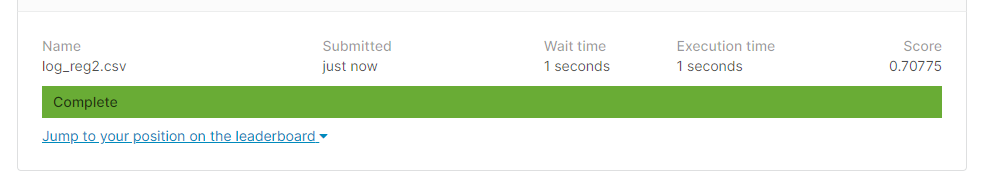